## Case Study - Manipulating DataFrames with pandas - Olympic Medals 1896-2012
This is a dataset from The Guardian. It comprises records of all events held at the Olympic games between 1896 and 2012. We will apply some advanced pandas concepts while demonstrating grouping, pivoting and aggregation functionalities to explore the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Set the location of data file locally or online
data_file=r'C:\Users\sefi\Documents\My Python Repository\DataCamp\i) Manipulating DataFrames with pandas\datasets\all_medalists.csv'

# Let's read in the data file: medals
df = pd.read_csv(data_file)

# Investigate first 5 rows of the dataset
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [9]:
# Let's review the data types of the attributes/features/columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


### T1 - Find the total number of medals awarded to the USA per edition (year).

In [16]:
# Filter for USA rows first
USA_filter = df.NOC == 'USA'

# Using the filter for the df, we group it by edition; this creates a groupby pandas object
USA_edition_grouped = df.loc[USA_filter].groupby('Edition')

# To find the total number of medals and each row corresponds to medals per year, we aggregate the groupby object with .count()
USA_edition_grouped.count().head()

,City,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
Edition,,,,,,,,,
1896,20,20,20,20,20,20,20,20,20
1900,55,55,55,55,55,55,55,55,55
1904,394,394,394,394,394,394,394,394,394
1908,63,63,63,63,63,63,63,63,63
1912,101,101,101,101,101,101,101,101,101


### T2 - Find the top 15 countries ranked by total number of medals.

In [38]:
# First, select the countries by using the 'NOC' column: country_names (result is a Series object)
country_names = df['NOC']

# Count the number of medals won by each country: medal_counts - 2 way to do it:
# 1) .value_counts() sorts by values by default. The result is returned as a Series of counts indexed by unique entries 
# from the original Series with values (counts) ranked in descending order.
medal_counts = country_names.value_counts()

# 2) We can group the df by our column from above and select  'NOC' (or one of the other columns)
# and count (then we can sort values)
medal_counts1 = df.groupby(country_names)['NOC'].count().sort_values(ascending=False)

medal_counts.head(5)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
Name: NOC, dtype: int64

In [39]:
medal_counts1.head(5)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
Name: NOC, dtype: int64

### T3 - Compute how many separate bronze, silver and gold medals each country won - pivot_table()

To accomlish this task, we will use .pivot_table() first to aggregate the total medals by type. Then, we can use .sum() along the columns of the pivot table to produce a new column.

In [46]:
# Construct the pivot table: counted
# Parameter set-up:
# aggfunc = 'count' - we want to count the rows (aggregation)
# values = 'Athlete' - we want use 'Athlete' values in the new DataFrame - this choice doesnt matter
# index = 'NOC' - we want to use countries as the index for the new DataFrame
# columns='Medal' - we want to have different medals as columns

counted = df.pivot_table(aggfunc='count', values='Athlete', index='NOC', columns='Medal')
counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [49]:
# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns') # column axis will total each rows values across the columns
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0


In [53]:
# Sort counted by the 'totals' column
counted = counted.sort_values(by='totals',ascending=False)
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0


### T4 - Explore difference between the 'Event_gender' and 'Gender' columns

In [67]:
# Select columns: ev_gen
ev_gen = df.loc[:,['Event_gender','Gender']]

ev_gen.head()

,Event_gender,Gender
0,M,Men
1,M,Men
2,M,Men
3,M,Men
4,M,Men


In [68]:
# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


### T5 - Find possible errors with .groupby()

In [69]:
# Group df by the two columns: medals_by_gender
medals_by_gender = df.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

medal_count_by_gender

# It looks like there is a row that is most likely a data error - Men record with an in Women's event

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

 ### T6 - Inspect the suspect record by locating the offending row

In [70]:
# Create the Boolean Series with a condition that captures the only row 
suspect_row = (df.Event_gender == 'W') & (df.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals.loc[suspect_row]

suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


### T7 - Rank by distinct sports medals won

In [86]:
# Group medals by 'NOC': country_grouped
country_grouped = df.groupby('NOC')

In [87]:
# Compute the number of distinct sports in which each country won medals. To do this,
# select the 'Sport' column from country_grouped and apply .nunique()
country_grouped['Sport'].nunique().sort_values(ascending=False)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
       ..
ERI     1
TAN     1
ECU     1
DJI     1
AFG     1
Name: Sport, Length: 138, dtype: int64

### T8 - Aggregate the number of distinct sports in which the USA and the USSR won medals between 1952 and 1988

In [96]:
# Let's create a Boolean Series that is True when 'Edition'(Year) is between 1952 and 1988
during_cold_war = (df['Edition'] >= 1952) & (df['Edition'] <= 1988)

In [97]:
# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = df.NOC.isin(['USA','URS'])

In [98]:
# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = df.loc[during_cold_war & is_usa_urs]

In [100]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


### T9 - Which country, the USA or the USSR, won the most medals consistently over the Cold War period?

In [106]:
# Create the pivot table: medals_won_by_country
# aggfunc = 'count' - we want to count the rows (aggregation)
# values = 'Athlete' - we want use 'Athlete' values - It captures every medal regardless of kind
# index = 'Edition' - we want to use years as the index 
# columns='NOC' - we want to have the countries as columns
medals_won_by_country = df.pivot_table(aggfunc='count',index='Edition',columns='NOC',values='Athlete')
medals_won_by_country.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Slice medals_won_by_country by years and the countries of interest: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

In [108]:
# Create most_medals
# .idxmax() returns the index of the maximizing element per year
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

In [109]:
# value_counts() counts the number of occurrences of each
# The result gives the number of times each of the USA or the USSR won more Olympic medals 
# in total than the other between 1952 and 1988.
most_medals.value_counts()

URS    8
USA    2
dtype: int64

### T10 - Visualizing USA Medal Counts by Edition

a) LINE PLOT

In [116]:
# Filter for USA rows first
USA_filter = df['NOC'] == 'USA'

In [126]:
# Group by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = df.loc[USA_filter].groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year.head()

Edition  Medal 
1896     Bronze     2
         Gold      11
         Silver     7
1900     Bronze    14
         Gold      27
Name: Athlete, dtype: int64

In [127]:
# Reshape usa_medals_by_year by unstacking - Matplotlib will dot deal with Multiindex well, so go vact to one-level indexing
usa_medals_by_year = usa_medals_by_year.unstack(level=1) # or level='Medal'
usa_medals_by_year.head()

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25


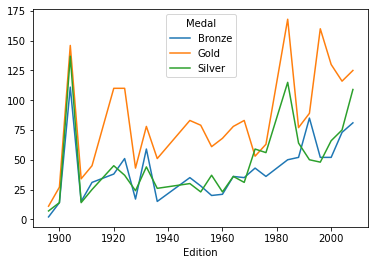

In [128]:
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

b) AREA PLOT

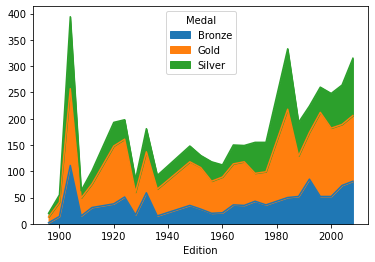

In [129]:
# Let's create the same chart in the form of an area plot
usa_medals_by_year.plot(kind='area') # or usa_medals_by_year.plot.area()
plt.show()

Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

In [137]:
df['Medal'].head()
# It is a String object column originally

0      Gold
1    Silver
2    Bronze
3      Gold
4    Silver
Name: Medal, dtype: object

In [138]:
# Let's order the medals from Gold to Bronze and replot
# We can use pd.Categorical() function to set the categories in Olympic order
df['Medal'] = pd.Categorical(values = df['Medal'], categories=['Bronze', 'Silver', 'Gold'],ordered=True) 
df['Medal'].head()
# It is a Category object column after the transformation

0      Gold
1    Silver
2    Bronze
3      Gold
4    Silver
Name: Medal, dtype: category
Categories (3, object): [Bronze < Silver < Gold]

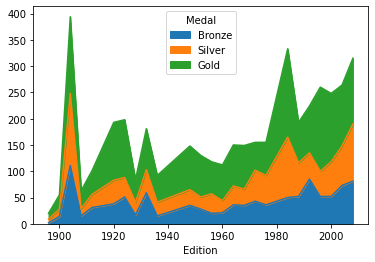

In [140]:
# Let's create the same chart in the form of an area plot now with order categories
# We will rerun the code from above now that we changed Medal column's type

USA_filter = df['NOC'] == 'USA'
usa_medals_by_year = df.loc[USA_filter].groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level=1)

usa_medals_by_year.plot(kind='area') # or usa_medals_by_year.plot.area()
plt.show()